In [1]:
import praw
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reddit = praw.Reddit(
    client_id="a8xe2I2h2OPCimOj9Xd8CQ",
    client_secret="1NZArNea-d6IPw7cZZF_x23Py6m-eQ",
    user_agent="my-app by u/Crafty_Stand3028",
    username="Crafty_Stand3028",
    password="vEt!iZxL4(^Hey7",
)

In [3]:
def getSubmissions(subreddit_name):
    result = []
    submissions = reddit.subreddit(subreddit_name).top(limit=None, params={'show': 'unpinned'})
    for sub in submissions:
        submission_data = {
            "title": sub.title,
            "author": sub.author.name if sub.author else "[deleted]",
            "created_utc": sub.created_utc,
            "score": sub.score,
            "num_comments": sub.num_comments,
            "permalink": sub.permalink,
            "id": sub.id,
            "url": sub.url,
            "is_self": sub.is_self,
            "selftext": sub.selftext,
            "link_flair_text": sub.link_flair_text,
            "link_flair_css_class": sub.link_flair_css_class,
            "is_video": sub.is_video,
            "media": sub.media,
            "thumbnail": sub.thumbnail
        }
        if submission_data['num_comments'] >= 50:
            result.append(submission_data)
    return result

In [33]:
science_subs = getSubmissions('science')
science_subs = pd.DataFrame(science_subs)
science_subs.to_csv('science_submissions.csv', index=False)

In [4]:
science_subs = pd.read_csv('science_submissions.csv')

In [5]:
# Function to retrieve comments from specific submissions
def getComments(submission_ids):
    result = []
    comment_count = 0
    
    for submission_id in submission_ids:
        submission = reddit.submission(id=submission_id)
        
        for comment in submission.comments.list():
            try:
                comment_data = {
                    "body": comment.body if comment else '',
                    "author": comment.author.name if comment.author else "[deleted]",
                    "created_utc": comment.created_utc,
                    "score": comment.score,
                    "parent_id": comment.parent_id,
                    "permalink": comment.permalink,
                    "id": comment.id,
                    "is_submitter": comment.is_submitter
                }
                result.append(comment_data)
                comment_count += 1

            except:
                continue
    return result

In [55]:
science_comments = getComments([x for x in science_subs['id']])

In [52]:
science_comments = pd.DataFrame(science_comments)
science_comments.to_csv('science_comments.csv', index=False)

In [6]:
science_comments = pd.read_csv('science_comments.csv')
science_comments

,body,author,created_utc,score,parent_id,permalink,id,is_submitter
0,i guess he did outlive his life expectancy by ...,dolpi,1.521000e+09,8266,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3q2x,False
1,Woah. One of those deaths you always saw comin...,MethLab4QT,1.521000e+09,9475,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3rhf,False
2,“We have this one life to appreciate the grand...,[deleted],1.521001e+09,12785,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3ucw,False
3,“I have lived with the prospect of an early de...,KorovaDroog,1.521001e+09,27269,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3umu,False
4,Remember to look up at the stars and not down ...,lucky_guy13,1.521001e+09,9773,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3uav,False
...,...,...,...,...,...,...,...,...
406065,[removed],[deleted],1.673886e+09,5,t1_j4llfrb,/r/science/comments/10dcouf/adhd_is_more_predi...,j4ln5r9,False
406066,In the US at least you cannot have refillable ...,Aurum555,1.673885e+09,23,t1_j4libxw,/r/science/comments/10dcouf/adhd_is_more_predi...,j4lkjea,False
406067,I've never been prescribed scheduled drug (tha...,Rodiruk,1.673885e+09,7,t1_j4lkjea,/r/science/comments/10dcouf/adhd_is_more_predi...,j4lkxue,False
406068,"Yep, and it is st the disgression of the presc...",Aurum555,1.673886e+09,8,t1_j4lkxue,/r/science/comments/10dcouf/adhd_is_more_predi...,j4llsq2,False


In [5]:
# science_comments = science_comments[(science_comments['author'] != '[deleted]') & (science_comments['body'] != "[removed]")]
science_comments['post_id'] = science_comments['permalink'].str.split('/').apply(lambda x: x[4])
science_comments.rename(columns={'parent_id': 'parent'}, inplace=True)
science_comments['parent_id'] = science_comments['parent'].str.extract(r'_(\w+)')
science_comments.to_csv('science_comments_filtered.csv', index=False)

In [6]:
science_comments = pd.read_csv('science_comments_filtered.csv')
science_comments.head(2)

,body,author,created_utc,score,parent,permalink,id,is_submitter,post_id,parent_id
0,i guess he did outlive his life expectancy by ...,dolpi,1.521000e+09,8266,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3q2x,False,84aiy6,84aiy6
1,Woah. One of those deaths you always saw comin...,MethLab4QT,1.521000e+09,9475,t3_84aiy6,/r/science/comments/84aiy6/physicist_stephen_h...,dvo3rhf,False,84aiy6,84aiy6


In [73]:
askscience_subs = getSubmissions('askscience')
askscience_subs = pd.DataFrame(askscience_subs)
askscience_subs.to_csv('askscience_submissions.csv', index=False)

In [7]:
askscience_subs = pd.read_csv('askscience_submissions.csv')
askscience_subs.head(2)

,title,author,created_utc,score,num_comments,permalink,id,url,is_self,selftext,link_flair_text,link_flair_css_class,is_video,media,thumbnail
0,Help us fight for net neutrality!,MockDeath,1.511380e+09,83381,1171,/r/askscience/comments/7etmk7/help_us_fight_fo...,7etmk7,https://www.reddit.com/r/askscience/comments/7...,True,The ability to browse the internet is at risk....,NaN,NaN,False,NaN,NaN
1,Stephen Hawking megathread,AskScienceModerator,1.521004e+09,65834,1639,/r/askscience/comments/84auzr/stephen_hawking_...,84auzr,https://www.reddit.com/r/askscience/comments/8...,True,"We were sad to learn that noted physicist, cos...",Physics,physics,False,NaN,NaN


In [90]:
askscience_comments = pd.DataFrame(askscience_comments)
askscience_comments.to_csv('askscience_comments.csv', index=False)

In [8]:
askscience_comments = pd.read_csv('askscience_comments.csv')

In [10]:
askscience_comments

,body,author,created_utc,score,parent_id,permalink,id,is_submitter
0,We can already see the effects of restricted c...,shiruken,1.511382e+09,3022,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7duai,False
1,It's time to stand up (litterally) against thi...,PM_ME_DUCKS,1.511386e+09,519,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7hudi,False
2,Not sure if this is the right place to ask but...,sunz3000,1.511386e+09,103,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7htxe,False
3,"To be proactive in case we lose the fight, wha...",re_searching,1.511385e+09,46,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7gs01,False
4,What would it be like if Verizon partnered up ...,[deleted],1.511388e+09,88,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7jtgy,False
...,...,...,...,...,...,...,...,...
247202,I like that idea too. People above you seem to...,Lexicon444,1.676218e+09,2,t1_j87uo5s,/r/askscience/comments/10zzzhl/from_an_evoluti...,j893bbj,False
247203,[removed],[deleted],1.676193e+09,-2,t1_j87zuer,/r/askscience/comments/10zzzhl/from_an_evoluti...,j8800gn,False
247204,You are correct. I should have stated the numb...,Nefarious_P_I_G,1.676221e+09,5,t1_j899ql1,/r/askscience/comments/10zzzhl/from_an_evoluti...,j89cr4k,False
247205,Its original meaning of being suited to partic...,you-are-not-yourself,1.676189e+09,11,t1_j87gxzo,/r/askscience/comments/10zzzhl/from_an_evoluti...,j87v603,False


In [9]:
# askscience_comments = askscience_comments[(askscience_comments['author'] != '[deleted]') & (askscience_comments['body'] != "[removed]")]
askscience_comments['post_id'] = askscience_comments['permalink'].str.split('/').apply(lambda x: x[4])
askscience_comments.rename(columns={'parent_id': 'parent'}, inplace=True)
askscience_comments['parent_id'] = askscience_comments['parent'].str.extract(r'_(\w+)')
askscience_comments.to_csv('askscience_comments_filtered.csv', index=False)

In [8]:
askscience_comments = pd.read_csv('askscience_comments_filtered.csv')
askscience_comments.head(2)

,body,author,created_utc,score,parent,permalink,id,is_submitter,post_id,parent_id
0,We can already see the effects of restricted c...,shiruken,1.511382e+09,3022,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7duai,False,7etmk7,7etmk7
1,It's time to stand up (litterally) against thi...,PM_ME_DUCKS,1.511386e+09,519,t3_7etmk7,/r/askscience/comments/7etmk7/help_us_fight_fo...,dq7hudi,False,7etmk7,7etmk7


In [9]:
print('Number of submissions in r/science:', len(science_subs))
print('Number of submissions in r/askscience:', len(askscience_subs))

print('Number of comments in r/science:', len(science_comments['author']))
print('Number of comments in r/askscience:', len(askscience_comments['author']))

print('Number of subscribers in r/science:', reddit.subreddit('science').subscribers)
print('Number of subscribers in r/askscience:', reddit.subreddit('askscience').subscribers)

Number of submissions in r/science: 991
Number of submissions in r/askscience: 997
Number of comments in r/science: 406070
Number of comments in r/askscience: 247207
Number of subscribers in r/science: 30754567
Number of subscribers in r/askscience: 24395363


In [10]:
# Function to build a tree for a given submission (post_id)
def build_tree(submission_df):
    G = nx.DiGraph()
    for _, row in submission_df.iterrows():
        G.add_node(row['parent_id'])  # Adding parent_id as a node
        G.add_node(row['id'])  # Adding comment_id as a node
        G.add_edge(row['id'], row['parent_id'])  # Adding edge from comment_id to parent_id
    return G

# Function to calculate the maximum width of a tree
def calculate_edges_from_root(graph, root):
    
    # Creating a reversed version of the graph
    reversed_graph = graph.reverse(copy=True)

    # Calculating the shortest paths from the root to all other nodes
    shortest_paths = nx.single_source_shortest_path(reversed_graph, root)
        
    # Calculating the number of edges in each shortest path
    edges_from_root = [len(path) - 1 for path in shortest_paths.values()]
    
    number_counts = {}

    for num in edges_from_root:
        if num in number_counts:
            number_counts[num] += 1
        else:
            number_counts[num] = 1

    return max(number_counts.values())

In [11]:
trees_dict = {}

# Groupping the data by post_id and build trees for each submission
for post_id, submission_df in science_comments.groupby('post_id'):
    tree = build_tree(submission_df)
    trees_dict[post_id] = tree

# Calculating the maximum depth, maximum width, and the number of nodes for each tree
science_trees = {}
for post_id, tree in trees_dict.items():
    max_depth = nx.dag_longest_path_length(tree)
    max_width = calculate_edges_from_root(tree, post_id)
    num_nodes = tree.number_of_nodes()
    science_trees[post_id] = {
        'tree': tree,
        'max_depth': max_depth,
        'max_width': max_width,
        'num_nodes': num_nodes
    }

In [12]:
trees_dict = {}

# Groupping the data by post_id and building trees for each submission
for post_id, submission_df in askscience_comments.groupby('post_id'):
    tree = build_tree(submission_df)
    trees_dict[post_id] = tree

# Calculating the maximum depth, maximum width, and the number of nodes for each tree
askscience_trees = {}
for post_id, tree in trees_dict.items():
    max_depth = nx.dag_longest_path_length(tree)
    max_width = calculate_edges_from_root(tree, post_id)
    num_nodes = tree.number_of_nodes()
    askscience_trees[post_id] = {
        'tree': tree,
        'max_depth': max_depth,
        'max_width': max_width,
        'num_nodes': num_nodes
    }

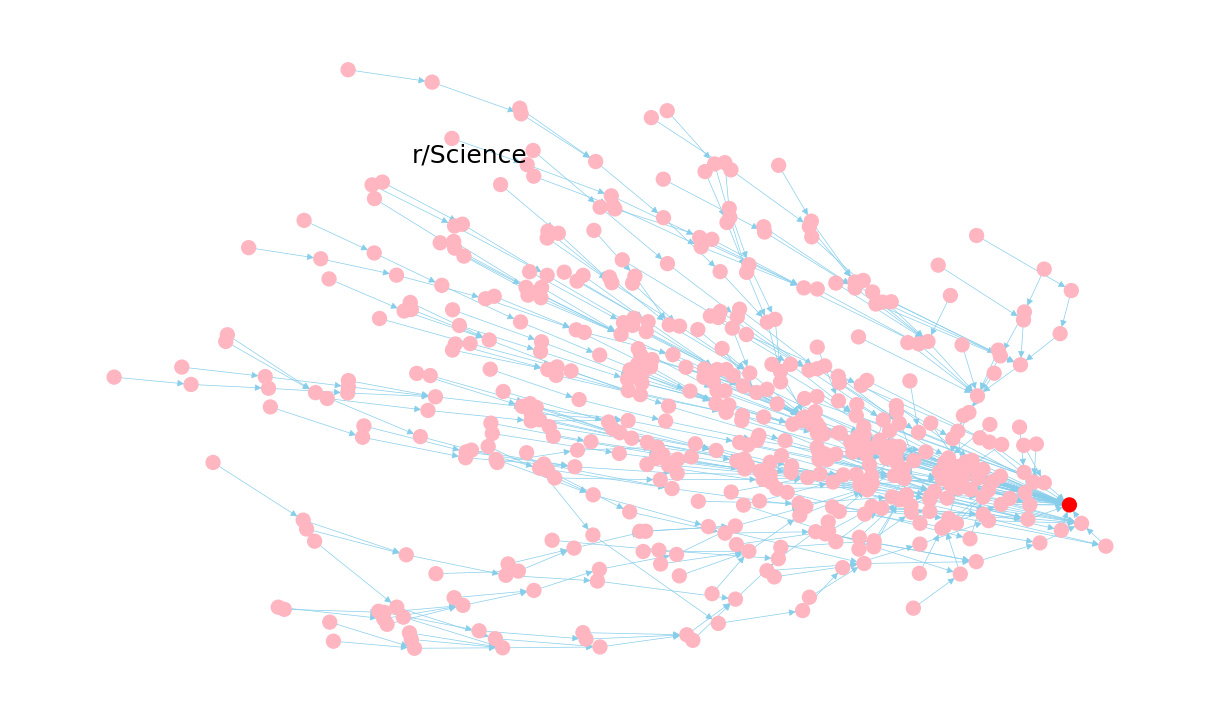

In [17]:
plt.figure(figsize=(12, 7))

G = science_trees[science_trees_df.loc[science_trees_df['num_nodes'].idxmax(), 'id']]['tree']

node_attributes = {'node_size': 100, 'font_size': 8}
edge_attributes = {'edge_color': '#87CEEB', 'width': 0.5}

node_degrees = dict(G.degree())

root_node = max(node_degrees, key=node_degrees.get)

node_colors = ['red' if node == root_node else '#FFB6C1' for node in G.nodes()]

nx.draw(G, node_color=node_colors, **node_attributes, **edge_attributes)

plt.text(-0.5, 0.5, 'r/Science', fontsize=18)

plt.show()

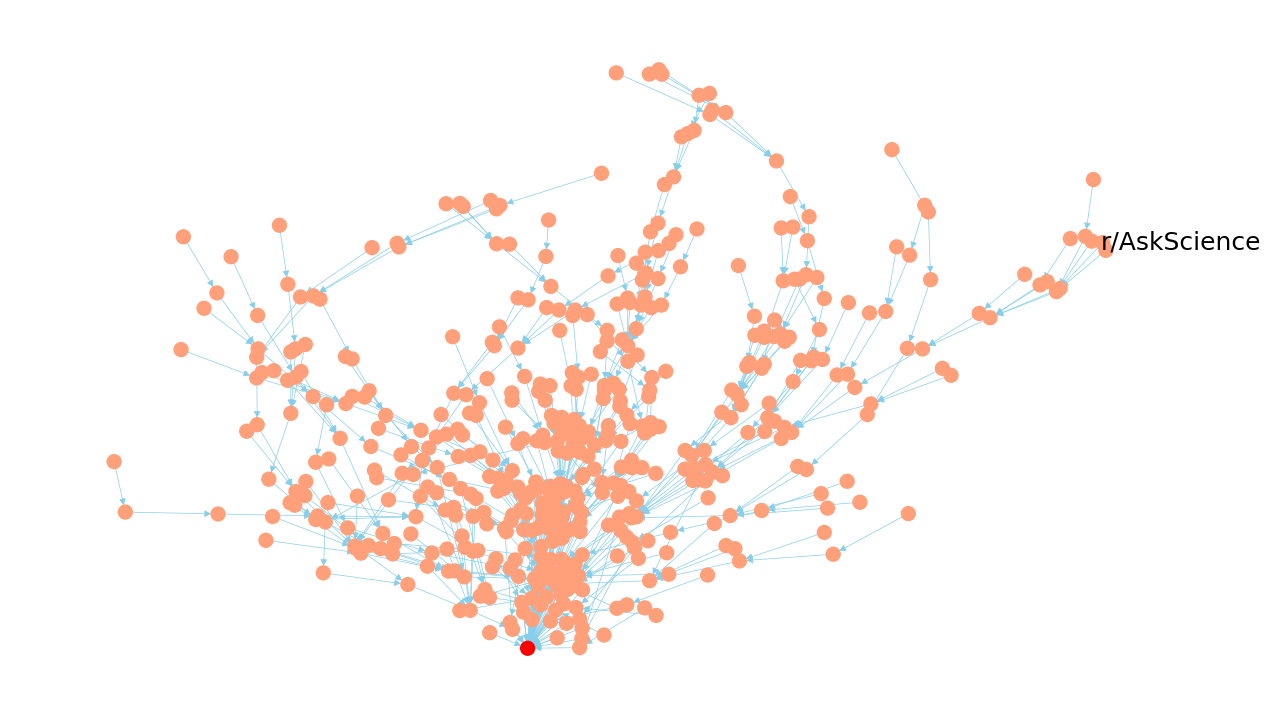

In [18]:
plt.figure(figsize=(12, 7))

max_num = askscience_trees_df['num_nodes'].idxmax()
max_depth = askscience_trees_df['max_depth'].idxmax()


G = askscience_trees[askscience_trees_df.loc[max_num, 'id']]['tree']

node_attributes = {'node_size': 100, 'font_size': 8}
edge_attributes = {'edge_color': '#87CEEB', 'width': 0.5}

node_degrees = dict(G.degree())

root_node = max(node_degrees, key=node_degrees.get)

node_colors = ['red' if node == root_node else '#FFA07A' for node in G.nodes()]

nx.draw(G, node_color=node_colors, **node_attributes, **edge_attributes)

# plt.text(0.5, 0.5, 'Number of nodes: ' + str(max_num) + '\nMaximum depth: ' + str(max_depth), fontsize=18)
plt.text(0.5, 0.5, 'r/AskScience', fontsize=18)

plt.show()

In [61]:
ratio = reddit.subreddit('science').subscribers/reddit.subreddit('askscience').subscribers
ratio

1.2601463860137285

In [13]:
science_trees_df = pd.DataFrame.from_dict(science_trees, orient='index')
science_trees_df.index.name = 'id'
science_trees_df = science_trees_df[['max_depth', 'max_width', 'num_nodes']]
science_trees_df.reset_index(inplace=True)
science_trees_df.head(2)

,id,max_depth,max_width,num_nodes
0,101nl24,10,101,439
1,105vr28,10,109,475


In [14]:
askscience_trees_df = pd.DataFrame.from_dict(askscience_trees, orient='index')
askscience_trees_df.index.name = 'id'
askscience_trees_df = askscience_trees_df[['max_depth', 'max_width', 'num_nodes']]
askscience_trees_df.reset_index(inplace=True)
askscience_trees_df.head(2)

,id,max_depth,max_width,num_nodes
0,1031gw1,8,56,156
1,103yjtz,9,35,137


In [20]:
max_depth_science = science_trees_df['max_depth']
max_depth_askscience = askscience_trees_df['max_depth']
mean_depth_science = np.mean(max_depth_science)
mean_depth_askscience = np.mean(max_depth_askscience)
print(mean_depth_science, mean_depth_askscience)

9.750756811301715 9.57171514543631


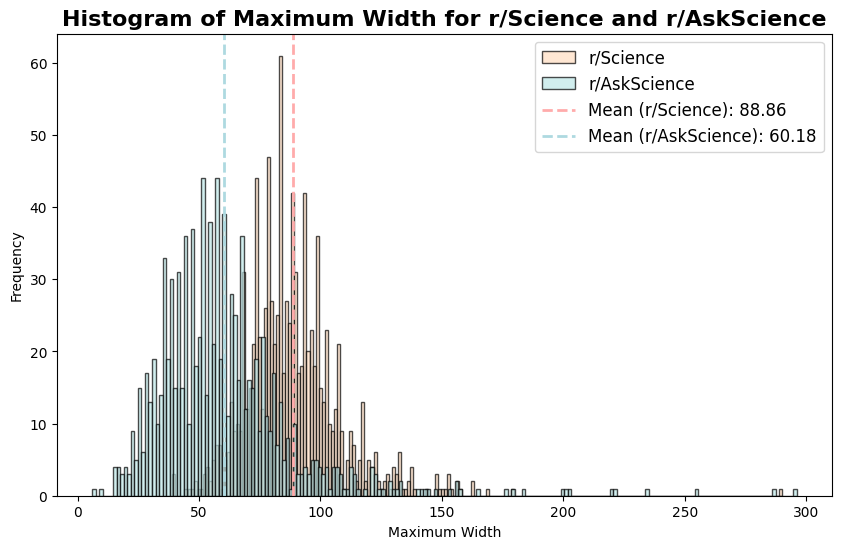

In [15]:
# Extracting the 'max_width' values for both datasets
max_width_science = science_trees_df['max_width']
max_width_askscience = askscience_trees_df['max_width']

# Creating histograms for both datasets
plt.figure(figsize=(10, 6))  # Increase the plot size
plt.hist(max_width_science, bins=200, edgecolor='k', alpha=0.7, label='r/Science', color='#FFDDC1')  
plt.hist(max_width_askscience, bins=200, edgecolor='k', alpha=0.7, label='r/AskScience', color='#BEE7E8') 

# Calculating mean values for both datasets
mean_width_science = np.mean(max_width_science)
mean_width_askscience = np.mean(max_width_askscience)

# Adding mean lines
plt.axvline(mean_width_science, color='#FFABAB', linestyle='dashed', linewidth=2, label=f'Mean (r/Science): {mean_width_science:.2f}')  # Light red
plt.axvline(mean_width_askscience, color='#AED9E0', linestyle='dashed', linewidth=2, label=f'Mean (r/AskScience): {mean_width_askscience:.2f}')  # Light blue

plt.xlabel('Maximum Width')
plt.ylabel('Frequency')
plt.title('Histogram of Maximum Width for r/Science and r/AskScience', fontsize=16, fontweight='bold')

plt.legend(fontsize=12)

plt.show()

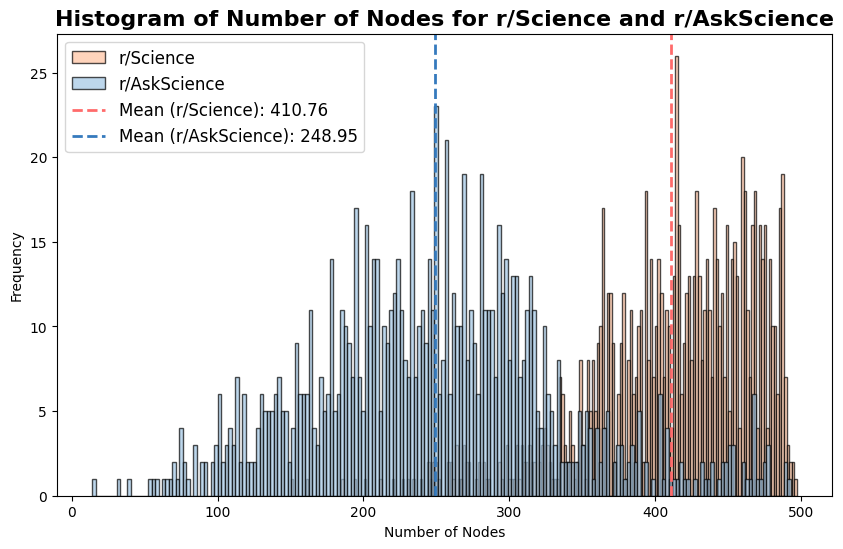

In [16]:
# Extracting the 'num_nodes' values for both datasets
num_nodes_science = science_trees_df['num_nodes']
num_nodes_askscience = askscience_trees_df['num_nodes']

# Creating histograms for both datasets
plt.figure(figsize=(10, 6))  # Increase the plot size
plt.hist(num_nodes_science, bins=200, edgecolor='k', alpha=0.7, label='r/Science', color='#FFC3A0')  # Pastel coral
plt.hist(num_nodes_askscience, bins=200, edgecolor='k', alpha=0.7, label='r/AskScience', color='#A2C7E5')  # Pastel blue

# Calculating mean values for both datasets
mean_nodes_science = np.mean(num_nodes_science)
mean_nodes_askscience = np.mean(num_nodes_askscience)

# Adding mean lines
plt.axvline(mean_nodes_science, color='#FF6B6B', linestyle='dashed', linewidth=2, label=f'Mean (r/Science): {mean_nodes_science:.2f}')  # Light red
plt.axvline(mean_nodes_askscience, color='#357ABD', linestyle='dashed', linewidth=2, label=f'Mean (r/AskScience): {mean_nodes_askscience:.2f}')  # Dark blue

plt.xlabel('Number of Nodes')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Nodes for r/Science and r/AskScience', fontsize=16, fontweight='bold')

plt.legend(fontsize=12)

plt.show()

In [17]:
science_members = reddit.subreddit('science').subscribers
askscience_members = reddit.subreddit('askscience').subscribers

In [18]:
scale = 100_000_000
norm_mean_depth_science = scale * science_trees_df['max_depth'].mean() / science_members 
norm_mean_width_science = scale * science_trees_df['max_width'].mean() / science_members
norm_mean_nodes_science = scale * science_trees_df['num_nodes'].mean() / science_members
               
    
norm_mean_depth_askscience = scale * askscience_trees_df['max_depth'].mean() / askscience_members
norm_mean_width_askscience = scale * askscience_trees_df['max_width'].mean() / askscience_members
norm_mean_nodes_askscience = scale * askscience_trees_df['num_nodes'].mean() / askscience_members

In [19]:
print(norm_mean_width_science, norm_mean_width_askscience, norm_mean_depth_science, norm_mean_depth_askscience, norm_mean_nodes_science, norm_mean_nodes_askscience) 

288.9185884594112 246.68836405428974 31.705054968239413 39.23578430283479 1335.5988182165481 1020.4839785288489


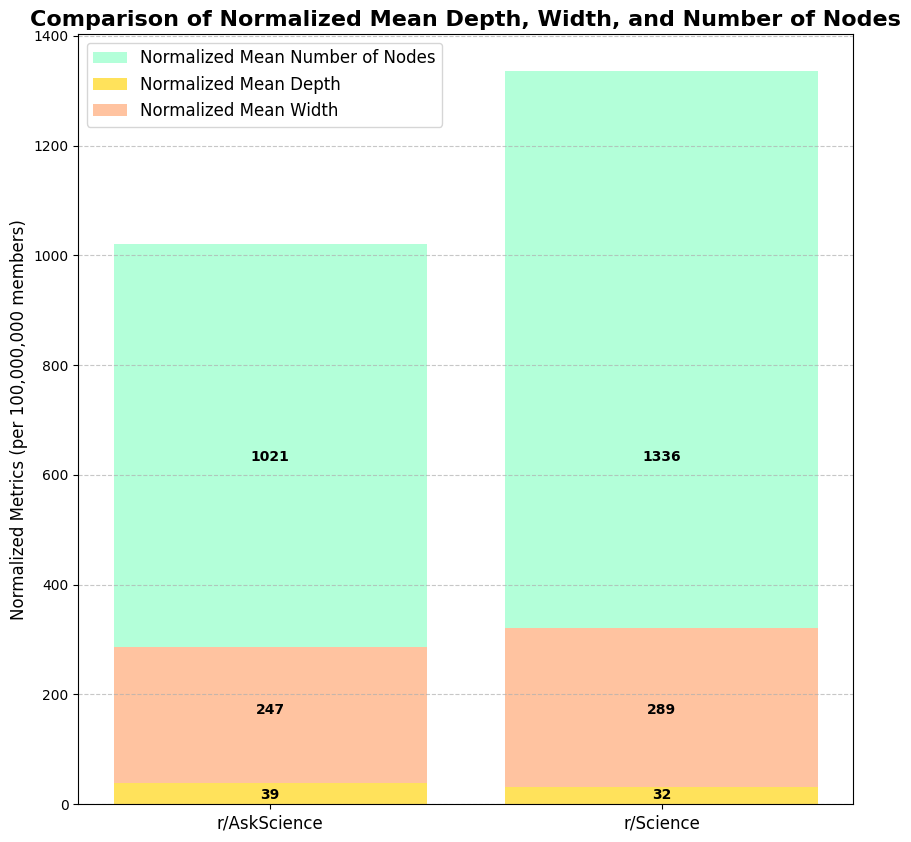

In [21]:
# Subreddits
subreddits = ['r/AskScience', 'r/Science']

# Scaled values for readability
scaled_mean_depth = [norm_mean_depth_askscience, norm_mean_depth_science]
scaled_mean_width = [norm_mean_width_askscience, norm_mean_width_science]
scaled_mean_nodes = [norm_mean_nodes_askscience, norm_mean_nodes_science]

# Custom colors
depth_color = '#FFE25B'
width_color = '#FFC3A0'
nodes_color = '#B3FFD9' 

# Creating a bar chart with custom colors
plt.figure(figsize=(10, 10))
bar3 = plt.bar(subreddits, scaled_mean_nodes, label='Normalized Mean Number of Nodes', color=nodes_color)
bar1 = plt.bar(subreddits, scaled_mean_depth, label='Normalized Mean Depth', color=depth_color)
bar2 = plt.bar(subreddits, scaled_mean_width, label='Normalized Mean Width', color=width_color, bottom=scaled_mean_depth)

plt.title('Comparison of Normalized Mean Depth, Width, and Number of Nodes', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Metrics (per 100,000,000 members)', fontsize=12)
plt.legend(fontsize=12)

# Label positions
label_positions = [
    (0, 5),  # (x, y) for depth label of r/askscience
    (1, 5),  # (x, y) for depth label of r/science
    (0, 160),  # (x, y) for width label of r/askscience
    (1, 160),  # (x, y) for width label of r/science
    (0, 620),  # (x, y) for nodes label of r/askscience
    (1, 620),  # (x, y) for nodes label of r/science
]

# Adding labels to the bars for all three metrics at specified positions
for label, position in zip(bar1 + bar2 + bar3, label_positions):
    plt.text(position[0], position[1], f'{label.get_height():.0f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='black')

# Customizing the x-axis ticks
plt.xticks(fontsize=12)

# Removing the x-axis label
plt.xlabel('')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

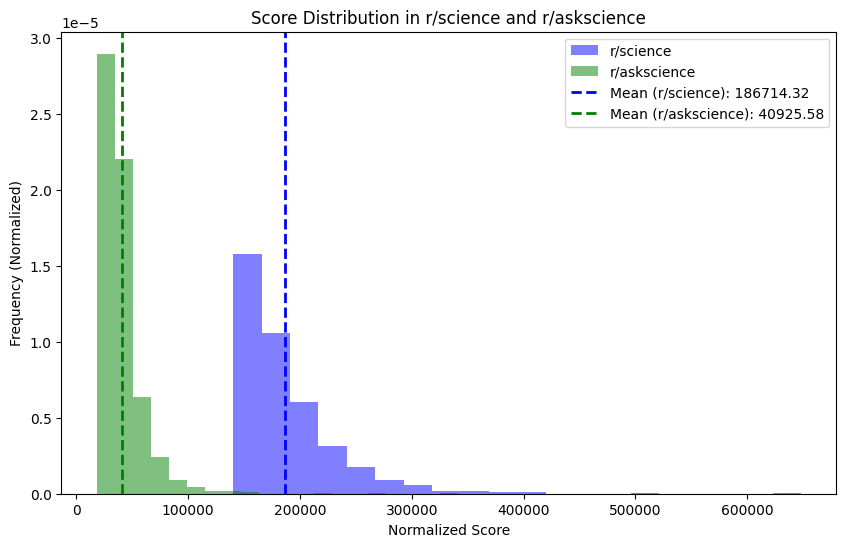

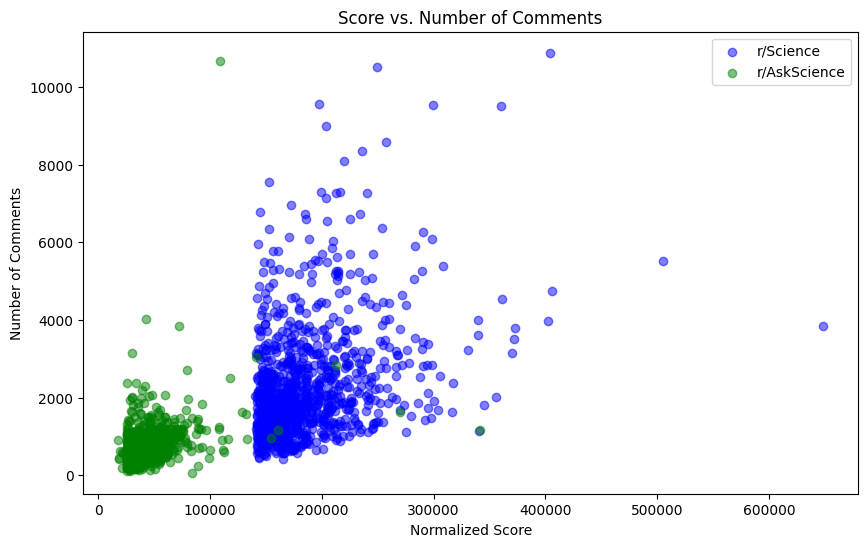

In [21]:
science_members = reddit.subreddit('science').subscribers
askscience_members = reddit.subreddit('askscience').subscribers

# Calculating normalized scores
a = scale * science_subs['score'] / science_members
b = scale * askscience_subs['score'] / askscience_members

# Calculating mean scores
mean_score_science = np.mean(a)
mean_score_askscience = np.mean(b)

# Creating histograms for normalized scores
plt.figure(figsize=(10, 6))
plt.hist(a, bins=20, alpha=0.5, label='r/science', color='blue', density=True)
plt.hist(b, bins=20, alpha=0.5, label='r/askscience', color='green', density=True)
plt.axvline(mean_score_science, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (r/science): {mean_score_science:.2f}')
plt.axvline(mean_score_askscience, color='green', linestyle='dashed', linewidth=2, label=f'Mean (r/askscience): {mean_score_askscience:.2f}')
plt.xlabel('Normalized Score')
plt.ylabel('Frequency (Normalized)')
plt.title('Score Distribution in r/science and r/askscience')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

# Scatter plot of normalized score vs. number of comments for r/science
plt.scatter(a, science_subs['num_comments'], alpha=0.5, label='r/Science', color='blue')
# Scatter plot of normalized score vs. number of comments for r/askscience
plt.scatter(b, askscience_subs['num_comments'], alpha=0.5, label='r/AskScience', color='green')

plt.xlabel('Normalized Score')
plt.ylabel('Number of Comments')
plt.title('Score vs. Number of Comments')
plt.legend()
plt.show()


In [28]:
print(mean_score_science, mean_score_askscience)

186765.91790739386 40934.3480349197


In [23]:
def betweenness_centrality_means(trees):
    means = []
    for id in trees:
        betweenness_centrality = nx.betweenness_centrality(trees[id]['tree'])
        means.append(np.mean(list(betweenness_centrality.values())))
    return means

In [24]:
betweenness_askscience = betweenness_centrality_means(askscience_trees)
betweenness_science = betweenness_centrality_means(science_trees)                            

In [26]:
# Calculating mean, standard deviation, and other descriptive statistics
mean_betweenness_askscience = np.mean(betweenness_askscience)
std_betweenness_askscience = np.std(betweenness_askscience)
median_betweenness_askscience = np.median(betweenness_askscience)
q1_betweenness_askscience = np.percentile(betweenness_askscience, 25)
q3_betweenness_askscience = np.percentile(betweenness_askscience, 75)

mean_betweenness_science = np.mean(betweenness_science)
std_betweenness_science = np.std(betweenness_science)
median_betweenness_science = np.median(betweenness_science)
q1_betweenness_science = np.percentile(betweenness_science, 25)
q3_betweenness_science = np.percentile(betweenness_science, 75)

print("Descriptive Statistics for 'r/AskScience':")
print(f"Mean: {mean_betweenness_askscience}")
print(f"Standard Deviation: {std_betweenness_askscience}")
print(f"Median: {median_betweenness_askscience}")
print(f"Q1: {q1_betweenness_askscience}")
print(f"Q3: {q3_betweenness_askscience}")

print("\nDescriptive Statistics for 'r/Science':")
print(f"Mean: {mean_betweenness_science}")
print(f"Standard Deviation: {std_betweenness_science}")
print(f"Median: {median_betweenness_science}")
print(f"Q1: {q1_betweenness_science}")
print(f"Q3: {q3_betweenness_science}")

Descriptive Statistics for 'r/AskScience':
Mean: 0.00019848611467008842
Standard Deviation: 0.0002914881344592782
Median: 0.00013384682748188837
Q1: 8.955801193910327e-05
Q3: 0.00021479792472158885

Descriptive Statistics for 'r/Science':
Mean: 4.599028604050393e-05
Standard Deviation: 1.8130040036843413e-05
Median: 4.242519962259464e-05
Q1: 3.4868245686065275e-05
Q3: 5.191208278413942e-05


In [28]:
def degree_centrality_means(trees):
    means = []
    for id in trees:
        degree_centrality = nx.degree_centrality(trees[id]['tree'])
        means.append(np.mean(list(degree_centrality.values())))
    return means

In [29]:
degree_askscience = degree_centrality_means(askscience_trees)
degree_science = degree_centrality_means(science_trees)                            

In [31]:
# Calculating mean, standard deviation, and other descriptive statistics
mean_degree_askscience = np.mean(degree_askscience)
std_degree_askscience = np.std(degree_askscience)
median_degree_askscience = np.median(degree_askscience)
q1_degree_askscience = np.percentile(degree_askscience, 25)
q3_degree_askscience = np.percentile(degree_askscience, 75)

mean_degree_science = np.mean(degree_science)
std_degree_science = np.std(degree_science)
median_degree_science = np.median(degree_science)
q1_degree_science = np.percentile(degree_science, 25)
q3_degree_science = np.percentile(degree_science, 75)

print("Descriptive Statistics for 'r/AskScience':")
print(f"Mean: {mean_degree_askscience}")
print(f"Standard Deviation: {std_degree_askscience}")
print(f"Median: {median_degree_askscience}")
print(f"Q1: {q1_degree_askscience}")
print(f"Q3: {q3_degree_askscience}")

print("\nDescriptive Statistics for 'r/Science':")
print(f"Mean: {mean_degree_science}")
print(f"Standard Deviation: {std_degree_science}")
print(f"Median: {median_degree_science}")
print(f"Q1: {q1_degree_science}")
print(f"Q3: {q3_degree_science}")

Descriptive Statistics for 'r/AskScience':
Mean: 0.009453466932192482
Standard Deviation: 0.0063540890625069365
Median: 0.008064516129032256
Q1: 0.00668896321070234
Q3: 0.010309278350515465

Descriptive Statistics for 'r/Science':
Mean: 0.004994592759778679
Standard Deviation: 0.0009351063010850078
Median: 0.0047732696897374695
Q1: 0.0043859649122807015
Q3: 0.005298022539401849


In [37]:
merged1 = science_comments.merge(science_subs[['id', 'created_utc']], left_on='post_id', right_on='id', how='left')
merged1.rename(columns={'created_utc_y': 'post_created_utc', 'created_utc_x':'created_utc', 'id_x':'id'}, inplace=True)
merged1.drop(columns='id_y', inplace=True)
merged1['time_gap'] = merged1['created_utc'] - merged1['post_created_utc']

In [38]:
# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = merged1['time_gap'].quantile(0.25)
Q3 = merged1['time_gap'].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# The lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a mask to identify outliers
outliers = (merged1['time_gap'] < lower_bound) | (merged1['time_gap'] > upper_bound)

# Removing outliers from the DataFrame
data_cleaned1 = merged1[~outliers]

Mean Time Gap: 19313.083060521356 seconds
Median Time Gap: 16918.0 seconds
Minimum Time Gap: 0.0 seconds
Maximum Time Gap: 50808.0 seconds


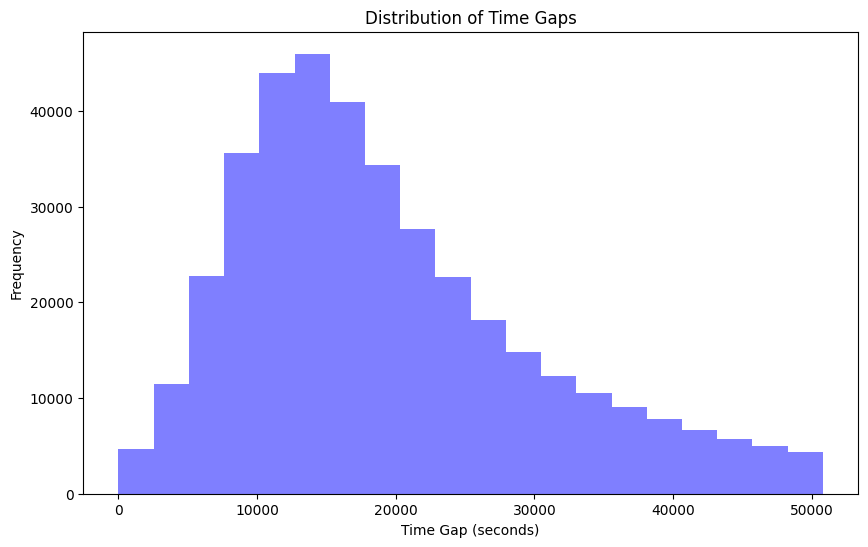

In [40]:
# Calculating basic statistics
mean_time_gap = data_cleaned1['time_gap'].mean()
median_time_gap = data_cleaned1['time_gap'].median()
min_time_gap = data_cleaned1['time_gap'].min()
max_time_gap = data_cleaned1['time_gap'].max()

print(f"Mean Time Gap: {mean_time_gap} seconds")
print(f"Median Time Gap: {median_time_gap} seconds")
print(f"Minimum Time Gap: {min_time_gap} seconds")
print(f"Maximum Time Gap: {max_time_gap} seconds")

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned1['time_gap'], bins=20, alpha=0.5, color='blue')
plt.xlabel('Time Gap (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Gaps')
plt.show()

In [41]:
merged2 = askscience_comments.merge(askscience_subs[['id', 'created_utc']], left_on='post_id', right_on='id', how='left')
merged2.rename(columns={'created_utc_y': 'post_created_utc', 'created_utc_x':'created_utc', 'id_x':'id'}, inplace=True)
merged2.drop(columns='id_y', inplace=True)
merged2['time_gap'] = merged2['created_utc'] - merged2['post_created_utc']

In [42]:
Q1 = merged2['time_gap'].quantile(0.25)
Q3 = merged2['time_gap'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (merged2['time_gap'] < lower_bound) | (merged2['time_gap'] > upper_bound)

data_cleaned2 = merged2[~outliers]

Mean Time Gap: 32788.77289369686 seconds
Median Time Gap: 28041.0 seconds
Minimum Time Gap: 101.0 seconds
Maximum Time Gap: 93881.0 seconds


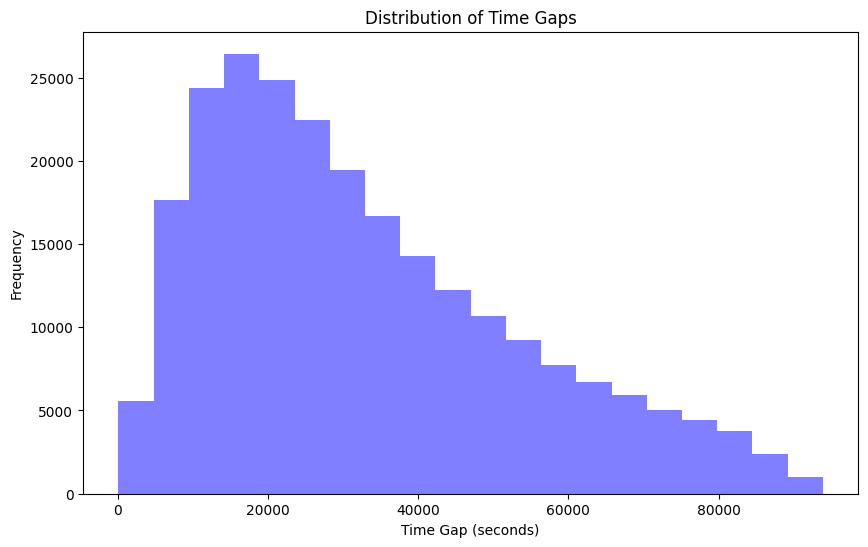

In [43]:
mean_time_gap = data_cleaned2['time_gap'].mean()
median_time_gap = data_cleaned2['time_gap'].median()
min_time_gap = data_cleaned2['time_gap'].min()
max_time_gap = data_cleaned2['time_gap'].max()

print(f"Mean Time Gap: {mean_time_gap} seconds")
print(f"Median Time Gap: {median_time_gap} seconds")
print(f"Minimum Time Gap: {min_time_gap} seconds")
print(f"Maximum Time Gap: {max_time_gap} seconds")

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned2['time_gap'], bins=20, alpha=0.5, color='blue')
plt.xlabel('Time Gap (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Gaps')
plt.show()

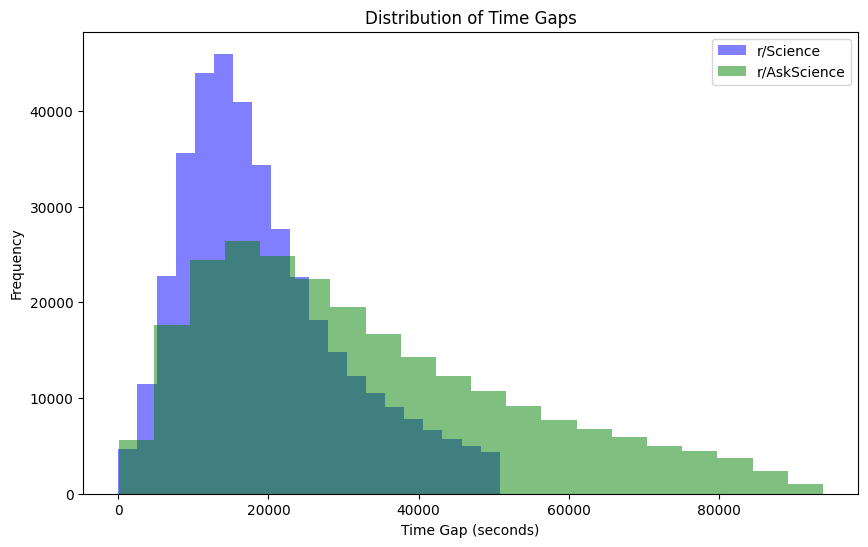

In [45]:
plt.figure(figsize=(10, 6))

plt.hist(data_cleaned1['time_gap'], bins=20, alpha=0.5, label='r/Science', color='blue')

plt.hist(data_cleaned2['time_gap'] + 10, bins=20, alpha=0.5, label='r/AskScience', color='green')

plt.xlabel('Time Gap (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Gaps')
plt.legend()

plt.show()

In [32]:
new_science_comments = science_comments[(science_comments['body'] != "[removed]")]
new_askscience_comments = askscience_comments[(askscience_comments['body'] != "[removed]")]

In [33]:
science_words_count = new_science_comments['body'].apply(lambda x: len(str(x).split()))
print(np.mean(science_words_count))

42.70981637560817


In [34]:
askscience_words_count = new_askscience_comments['body'].apply(lambda x: len(str(x).split()))
print(np.mean(askscience_words_count))

56.41078226697777


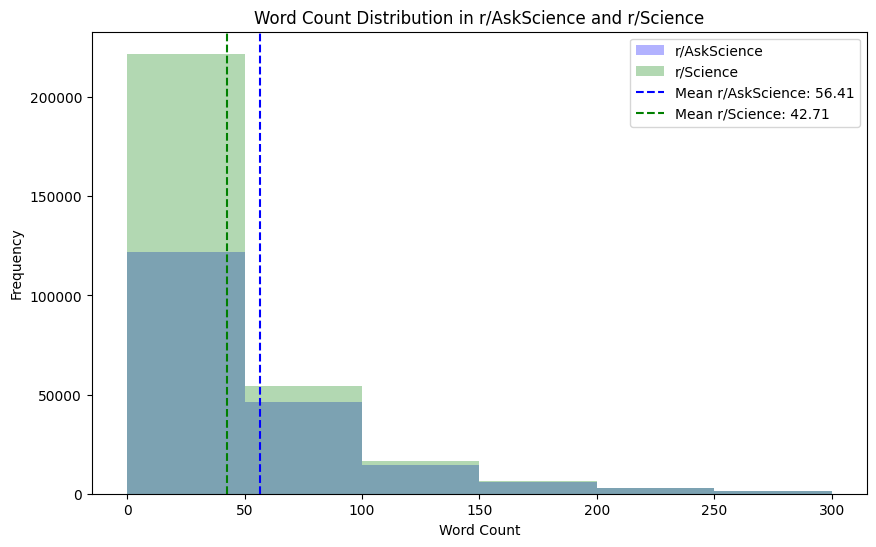

In [35]:
bins = [0, 50, 100, 150, 200, 250, 300]

plt.figure(figsize=(10, 6))
plt.hist(askscience_words_count, bins=bins, alpha=0.3, label='r/AskScience', color='blue')
plt.hist(science_words_count, bins=bins, alpha=0.3, label='r/Science', color='green')

askscience_mean = askscience_words_count.mean()
science_mean = science_words_count.mean()

plt.axvline(x=askscience_mean, color='blue', linestyle='--', label=f'Mean r/AskScience: {askscience_mean:.2f}')
plt.axvline(x=science_mean, color='green', linestyle='--', label=f'Mean r/Science: {science_mean:.2f}')



plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution in r/AskScience and r/Science')
plt.legend()

# Show the plot
plt.show()

For future 

In [46]:
# science_comments.groupby('post_id')['author'].nunique().reset_index(name='UniqueAuthorsCount')
# askscience_comments.groupby('post_id')['author'].nunique().reset_index(name='UniqueAuthorsCount')